Initial data processing

CodeOp individual project

March 2024

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
gen_df= pd.read_csv("Gen_Data/GenData_ANONYMISED_Feb2024 - Export.csv")

In [5]:
gen_df.head()

,ProgramName,Cohort_name,Student_ID,Age_at_application,appliedBefore,areaLocal,asylumSeeker,Barriers value,birthDate,Cohort_City,...,postCode,PostGenAspirationPosition,refugeeStat,religion,sexualityInfo,socioeconStatus,socioeconStatusMap,Unemployment_length,wellbeingConfidence,WellbeingConfidenceBaseline
0,ACC - IT Support,ACC-ITS-X1-BLM,582763,25.0,Yes,I live in a different area,No,4,1995-12-28,Nationwide,...,SS155LT,An entry-level position (typically for 0-1 yea...,No,"Christian (including Church of England, Cathol...",Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN
1,ACC - IT Support,ACC-ITS-X1-BLM,579826,44.0,Yes,I live in a different area,No,3,1977-03-17,Nationwide,...,BB88DW,An entry-level position (typically for 0-1 yea...,No,Choose not to say,Heterosexual (straight),Small business owners who employed less than 2...,Intermediate backgrounds,Not applicable,NaN,NaN
2,ACC - IT Support,ACC-ITS-X1-BLM,577847,29.0,Yes,London Region - Tower Hamlets,No,4,1992-07-24,Nationwide,...,E33BS,An entry-level position (typically for 0-1 yea...,No,Muslim,Heterosexual (straight),Small business owners who employed less than 2...,Intermediate backgrounds,Not applicable,NaN,NaN
3,ACC - IT Support,ACC-ITS-X1-BLM,595952,53.0,Yes,London Region - Havering,No,2,1968-10-06,Nationwide,...,RM113AS,An intermediate level position (typically 1-3 ...,No,Muslim,Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN
4,ACC - IT Support,ACC-ITS-X1-BLM,595718,39.0,Yes,West Midlands Region - Walsall,No,1,1982-04-18,Nationwide,...,WS33HW,A first-level management position (typically 5...,No,"Christian (including Church of England, Cathol...",Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN


In [10]:
gen_df.columns

Index(['ProgramName', 'Cohort_name', 'Student_ID', 'Age_at_application',
       'appliedBefore', 'areaLocal', 'asylumSeeker', 'Barriers value',
       'birthDate', 'Cohort_City', 'Current_Employer_Name',
       'Current_placement_aligned_to_training', 'Current_position',
       'education', 'Education level', 'educationStatusAtApplication',
       'Employer_Name_1', 'Employment_Status', 'employmentAttemptPreGen',
       'employmentHoursPreGen', 'employmentIndustryPreGen',
       'employmentSatisfactionPreGen', 'employmentStatusPreGen',
       'employmentTypePreGen', 'englishFirstLanguage', 'Ethnicity_Group',
       'Financial_Situation_PostGen', 'financialSituationPreGen',
       'First_placement_by_gen', 'First_Placement_Date', 'gender',
       'has_degree', 'Has_dependents', 'has_not_entry_level_ambition',
       'has_worked_5+_years', 'IMD_decile', 'Is_30_or_over', 'Is_disabled',
       'is_EAL', 'is_ethnic_minority', 'is_IE_EU_citizen', 'is_LGBTQ+',
       'is_lone_parent', 'is_low

In [11]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ProgramName                            1321 non-null   object 
 1   Cohort_name                            1321 non-null   object 
 2   Student_ID                             1321 non-null   int64  
 3   Age_at_application                     1311 non-null   float64
 4   appliedBefore                          622 non-null    object 
 5   areaLocal                              1233 non-null   object 
 6   asylumSeeker                           960 non-null    object 
 7   Barriers value                         1321 non-null   int64  
 8   birthDate                              1317 non-null   object 
 9   Cohort_City                            1240 non-null   object 
 10  Current_Employer_Name                  533 non-null    object 
 11  Curr

[['ProgramName', 'Cohort_name', 'Student_ID', 'Age_at_application',
       'appliedBefore', 'areaLocal', 'asylumSeeker', 'Barriers value',
       'birthDate', 'Cohort_City', 'Current_Employer_Name',
       'Current_placement_aligned_to_training', 'Current_position',
       'education', 'Education level', 'educationStatusAtApplication',
       'Employer_Name_1', 'Employment_Status', 'employmentAttemptPreGen',
       'employmentHoursPreGen', 'employmentIndustryPreGen',
       'employmentSatisfactionPreGen', 'employmentStatusPreGen',
       'employmentTypePreGen', 'englishFirstLanguage', 'Ethnicity_Group',
       'Financial_Situation_PostGen', 'financialSituationPreGen',
       'First_placement_by_gen', 'First_Placement_Date', 'gender',
       'has_degree', 'Has_dependents', 'has_not_entry_level_ambition',
       'has_worked_5+_years', 'IMD_decile', 'Is_30_or_over', 'Is_disabled',
       'is_EAL', 'is_ethnic_minority', 'is_IE_EU_citizen', 'is_LGBTQ+',
       'is_lone_parent', 'is_low_socio_econ', 'is_unempl_12+_mths',
       'is_unemployed_pre_gen', 'is_unsatisfied_empl_pre_gen',
       'learnerSpecialNeedsDetails', 'postCode', 'PostGenAspirationPosition',
       'refugeeStat', 'religion', 'sexualityInfo', 'socioeconStatus',
       'socioeconStatusMap', 'Unemployment_length', 'wellbeingConfidence',
       'WellbeingConfidenceBaseline']]

In [24]:
gen_df_basic = gen_df[['ProgramName', 'Cohort_name', 'Student_ID', 'Age_at_application',
                 'areaLocal', 'Barriers value', 'Cohort_City', 
                 'Current_Employer_Name', 'Current_position','education', 'Education level', 
                 'educationStatusAtApplication','Employment_Status', 
                 'employmentAttemptPreGen','employmentHoursPreGen', 'employmentIndustryPreGen','employmentSatisfactionPreGen', 'employmentStatusPreGen',
                 'employmentTypePreGen', 'englishFirstLanguage', 'Ethnicity_Group',
                 'Financial_Situation_PostGen', 'financialSituationPreGen', 
                 'First_Placement_Date', 'gender','has_degree', 'Has_dependents', 'has_not_entry_level_ambition',
                 'has_worked_5+_years', 'IMD_decile', 'Is_30_or_over', 'Is_disabled','is_EAL', 'is_ethnic_minority', 'is_IE_EU_citizen', 'is_LGBTQ+',
                 'is_lone_parent', 'is_low_socio_econ', 'is_unempl_12+_mths','is_unemployed_pre_gen', 'is_unsatisfied_empl_pre_gen',
                 'learnerSpecialNeedsDetails', 'postCode', 'PostGenAspirationPosition','refugeeStat', 'religion', 'sexualityInfo', 'socioeconStatus',
                 'socioeconStatusMap', 'Unemployment_length', 'wellbeingConfidence','WellbeingConfidenceBaseline']]

In [13]:
gen_df["learnerSpecialNeedsDetails"].value_counts()

learnerSpecialNeedsDetails
No                                                                                                                                                                                               23
Dyslexia                                                                                                                                                                                         19
Not applicable                                                                                                                                                                                   14
NONE                                                                                                                                                                                              9
Depression                                                                                                                                                                                   

NOTE: Text analysis could be good for the following features:
- learnerSpecialNeedsDetails
- 

In [25]:
gen_df_basic.head()

,ProgramName,Cohort_name,Student_ID,Age_at_application,areaLocal,Barriers value,Cohort_City,Current_Employer_Name,Current_position,education,...,postCode,PostGenAspirationPosition,refugeeStat,religion,sexualityInfo,socioeconStatus,socioeconStatusMap,Unemployment_length,wellbeingConfidence,WellbeingConfidenceBaseline
0,ACC - IT Support,ACC-ITS-X1-BLM,582763,25.0,I live in a different area,4,Nationwide,NaN,No data,University degree or higher complete,...,SS155LT,An entry-level position (typically for 0-1 yea...,No,"Christian (including Church of England, Cathol...",Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN
1,ACC - IT Support,ACC-ITS-X1-BLM,579826,44.0,I live in a different area,3,Nationwide,Fujitsu - UK,No data,I did not complete my GCSEs,...,BB88DW,An entry-level position (typically for 0-1 yea...,No,Choose not to say,Heterosexual (straight),Small business owners who employed less than 2...,Intermediate backgrounds,Not applicable,NaN,NaN
2,ACC - IT Support,ACC-ITS-X1-BLM,577847,29.0,London Region - Tower Hamlets,4,Nationwide,Carpetright,IT Service Desk Analyst,A Levels complete,...,E33BS,An entry-level position (typically for 0-1 yea...,No,Muslim,Heterosexual (straight),Small business owners who employed less than 2...,Intermediate backgrounds,Not applicable,NaN,NaN
3,ACC - IT Support,ACC-ITS-X1-BLM,595952,53.0,London Region - Havering,2,Nationwide,NaN,No data,University degree or higher complete,...,RM113AS,An intermediate level position (typically 1-3 ...,No,Muslim,Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN
4,ACC - IT Support,ACC-ITS-X1-BLM,595718,39.0,West Midlands Region - Walsall,1,Nationwide,NaN,No data,University degree or higher complete,...,WS33HW,A first-level management position (typically 5...,No,"Christian (including Church of England, Cathol...",Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN


<Axes: xlabel='Barriers value', ylabel='Count'>

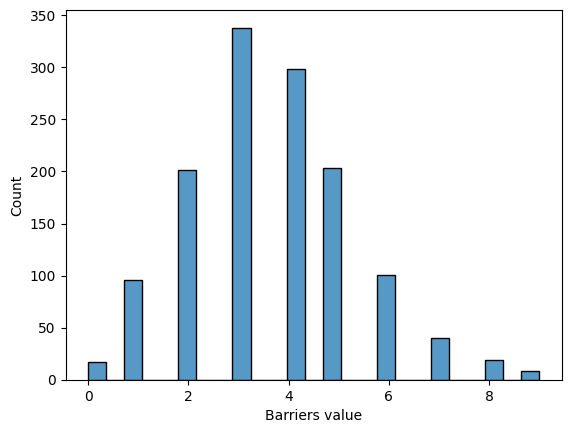

In [37]:
sns.histplot(data= gen_df_basic, x="Barriers value")

Text(0.5, 1.0, 'Number of barriers count + Employment status')

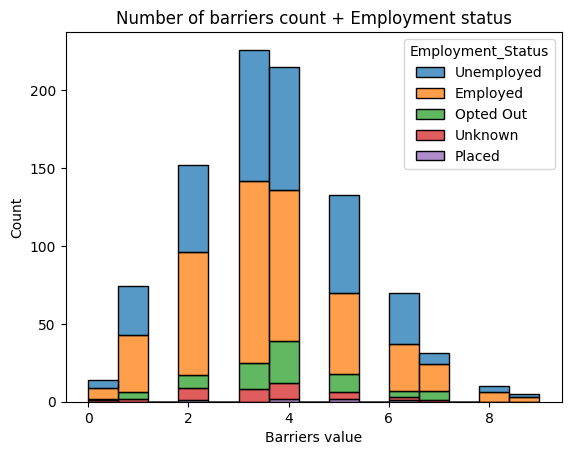

In [36]:
sns.histplot(data= gen_df_basic, 
             x="Barriers value", 
             hue="Employment_Status",
             multiple="stack")

plt.title("Number of barriers count + Employment status")

In [29]:
gen_df_basic["Employment_Status"].value_counts()

Employment_Status
Employed      445
Unemployed    364
Opted Out      79
Unknown        36
Placed          6
Name: count, dtype: int64

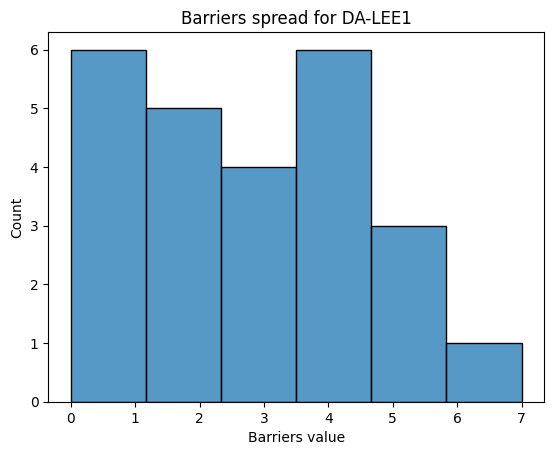

In [45]:
sns.histplot(gen_df_basic[gen_df_basic["Cohort_name"] == "DA-LEE1"], x= "Barriers value")
plt.title("Barriers spread for DA-LEE1")
plt.show()

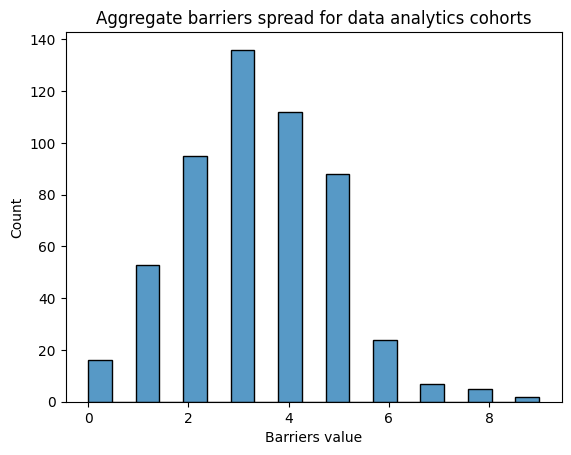

In [46]:
sns.histplot(gen_df_basic[gen_df_basic["ProgramName"] == "Data Analytics"], x= "Barriers value")
plt.title("Aggregate barriers spread for data analytics cohorts")
plt.show()

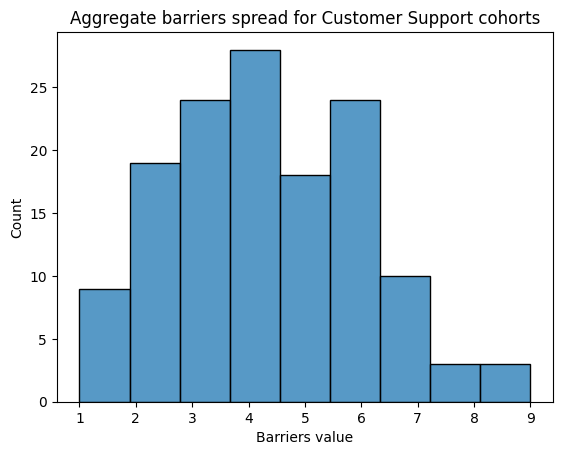

In [48]:
sns.histplot(gen_df_basic[gen_df_basic["ProgramName"] == "Customer Support"], x= "Barriers value")
plt.title("Aggregate barriers spread for Customer Support cohorts")
plt.show()

Text(0.5, 1.0, 'Number of barriers count + Programme name')

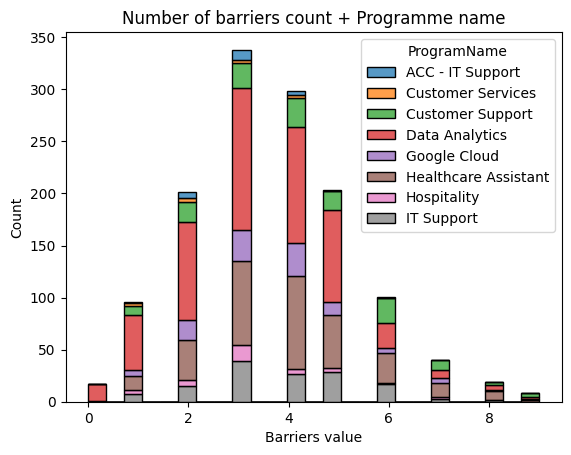

In [53]:
sns.histplot(data= gen_df_basic, 
             x="Barriers value", 
             hue="ProgramName",
             multiple="stack")

plt.title("Number of barriers count + Programme name")

In [65]:
total_EAL = gen_df_basic["is_EAL"][gen_df_basic["is_EAL"]==1].count()
total_EAL

510

Text(0.5, 1.0, 'Employment status count + EAL')

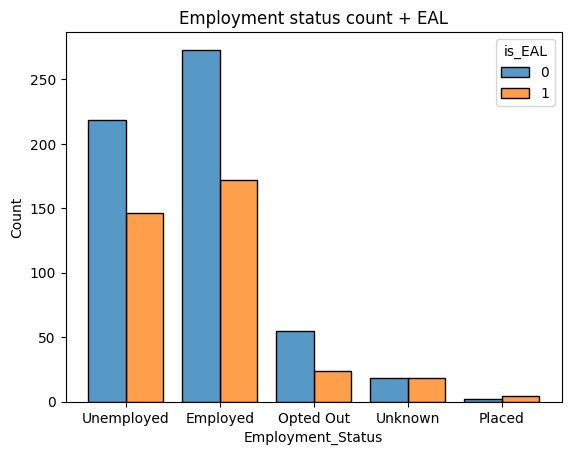

In [61]:
# How does EAL relate to post-bootcamp placement?


sns.histplot(data= gen_df_basic, 
             x="Employment_Status", 
             hue="is_EAL",
             multiple="dodge",
             shrink=.8)

plt.title("Employment status count + EAL")

Text(0.5, 1.0, 'Employment status count + EAL')

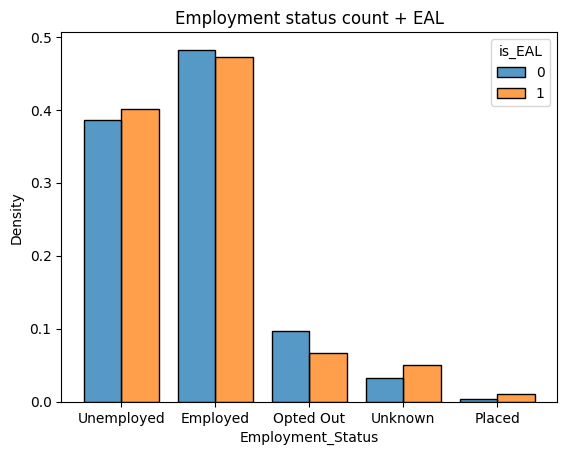

In [69]:
# How does EAL relate to post-bootcamp placement?


sns.histplot(data= gen_df_basic, 
             x="Employment_Status", 
             hue="is_EAL",
             multiple="dodge",
             stat="density",
             common_norm=False,
             shrink=.8)

plt.title("Employment status count + EAL")

Text(0.5, 1.0, 'Employment status count + EAL')

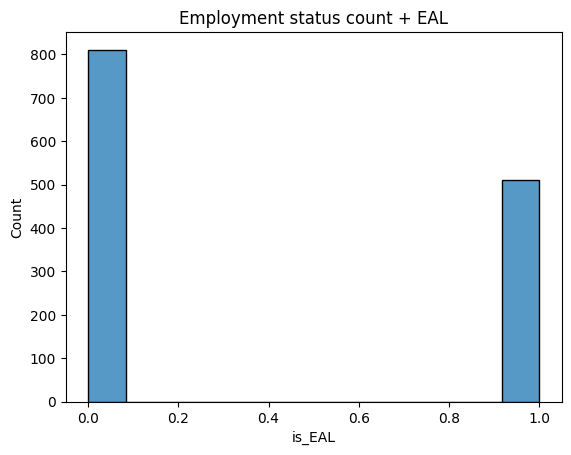

In [60]:
sns.histplot(data= gen_df_basic, 
             x="is_EAL")

plt.title("Employment status count + EAL")

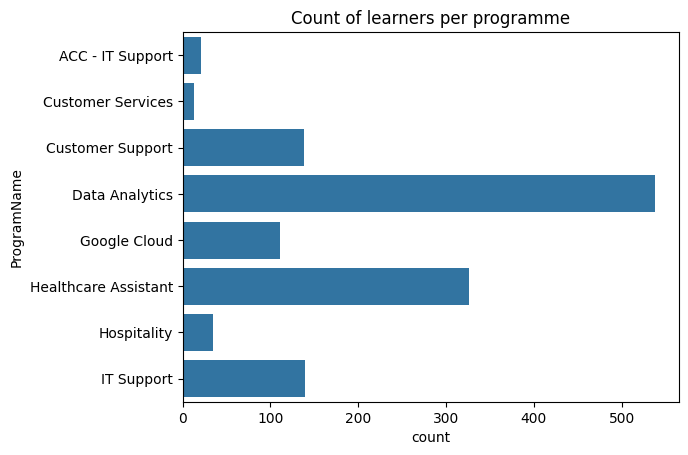

In [72]:
sns.countplot(y=gen_df_basic["ProgramName"])
plt.title("Count of learners per programme")
plt.show()

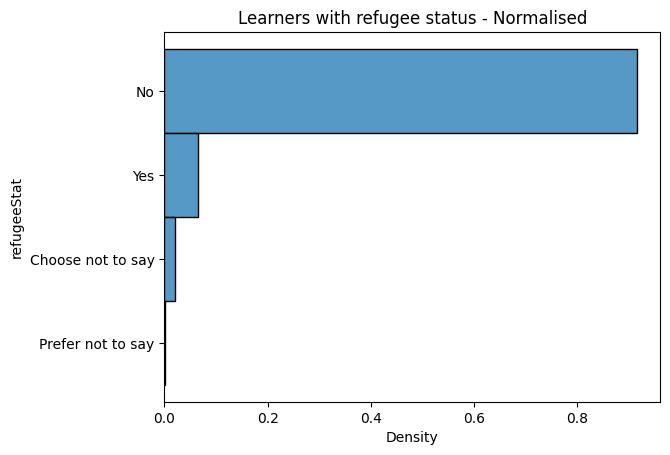

In [77]:
sns.histplot(y=gen_df_basic["refugeeStat"],
             stat="density",
             common_norm=False)
plt.title("Learners with refugee status - Normalised")
plt.show()

# Less than 10% of learners state report they have refugee status

In [80]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [82]:
@interact
def describe_col(column=list(gen_df_basic.columns)):
    print(gen_df_basic[column].describe())

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Age…

In [84]:
@interact
def histplot_col(column=list(gen_df_basic.columns)):
    sns.histplot(y=gen_df_basic[column],
             stat="density",
             common_norm=False)
    
    plt.title(f"Histogram of {column}")
    plt.show()

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Age…

Text(0.5, 1.0, 'Employment status count + Education level')

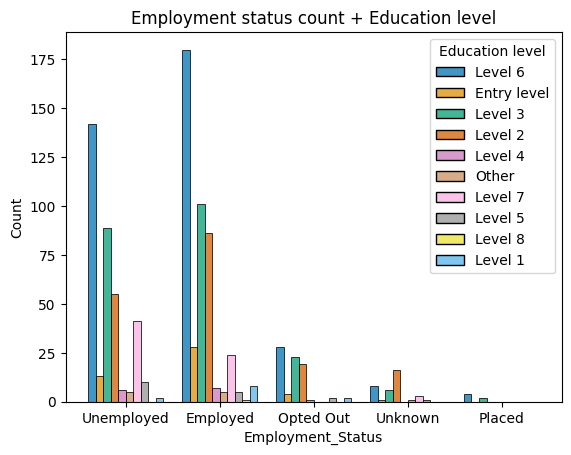

In [105]:
# How does education level relate to post-bootcamp placement?


sns.histplot(data= gen_df_basic, 
             x="Employment_Status", 
             hue="Education level",
             multiple="dodge",
             common_norm=False,
             shrink=.8,
             palette="colorblind")

plt.title("Employment status count + Education level")

People with L7 education are more often unemployed post-programme. This is different than the other educational categories and surprising since one might assume having more education will result in a higher chance of getting employed.

In [90]:
list(pd.unique(gen_df_basic["Education level"].values))

['Level 6',
 'Entry level',
 'Level 3',
 'Level 2',
 'Level 4',
 'Other',
 'Level 7',
 nan,
 'Level 5',
 'Level 8',
 'Level 1']

In [104]:
@interact

def histplot_barriers_edu(val = list(pd.unique(gen_df_basic["Education level"].values))):
    sns.histplot(data= gen_df_basic[gen_df_basic["Education level"] == val], 
            y="Barriers value",
            hue="is_EAL",
            multiple="dodge",
            common_norm=False,
            shrink=.8,
            palette="colorblind"
            )
    plt.title("Do people with EAL tend to have more barriers? Filter based on education level")
    plt.show()

interactive(children=(Dropdown(description='val', options=('Level 6', 'Entry level', 'Level 3', 'Level 2', 'Le…

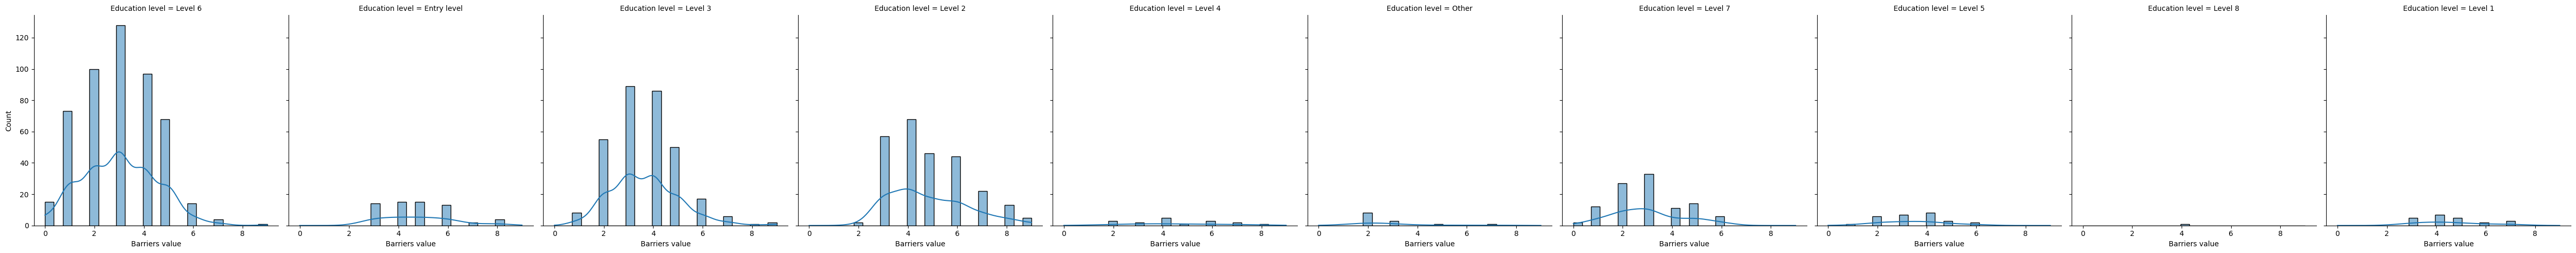

In [102]:
sns.displot(data=gen_df_basic,
            x="Barriers value",
            col="Education level",
            kde=True)

plt.show()

In [113]:
@interact
def histplot_col(column=list(gen_df_basic.columns)):
    sns.histplot(y=gen_df_basic[column],
             hue=gen_df_basic["Employment_Status"],
             multiple="dodge",
             shrink=.8
            )
    
    plt.title(f"Histogram of {column}")
    plt.show()

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Age…